# Tarea 3 - Pyhon para Análisis de Datos

__Entrega__: Viernes 06 de septiembre, hasta las 23:59hrs.

__Formulario entrega:__ 

__Nombre y Apellido:__ 

__Diplomado o Magister:__

---

En este problema extraeremos información a partir de una imagen astronómica. El análisis de imágenes es aplicado en diversos campos como el de la medicina y la agronomía.

La imágen que analizaremos está almacenada como un objeto `ndarray` de dos dimensiones (matriz) en el archivo `iras13224.npy`. Cada elemento `(i,j)` de la matriz corresponde a un pixel, cuyo valor corresponden a la intensidad del mismo.

## Parte 1

Para leer la imagen, esta debe ser cargada usando las función de Numpy `load()`

In [1]:
import numpy as np
import os
ruta_archivo=os.path.join(os.getcwd(),'IRAS13224.npy')
print(ruta_archivo)

/home/pepeperez/Documentos/01 Python/03 Tarea 3/IRAS13224.npy


In [2]:
#----------------------------------
# Lectura de la imagen
#----------------------------------
imagen=np.load(ruta_archivo)
print(type(imagen),imagen.shape,imagen.flags,imagen.strides,imagen.ndim,imagen.data)
print(imagen.base,imagen.dtype)
print(imagen[0,0])

<class 'numpy.ndarray'> (2048, 2048)   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False (8192, 4) 2 <memory at 0x7f7f61e4f708>
None >f4
3.6740181


## Parte 2
Una vez leída la imagen, determine estadísticas báscicas de la imágen, como 
- Tama~no de la imagen (en pixeles),
- Intensidad promedio,
- Intensidad mediana,
- Intensidad máxima,
- Intensidad mínima,
- Desviación estándar de la intensidad en toda la imágen.

In [3]:
#---------------------------------------------------
# Ingrese su código aquí
#---------------------------------------------------
print('Filas y columnas de imagen:',imagen.shape)
print('Tamaño de la imagen en pixeles:',imagen.size)
#print(imagen.itemsize)
print('Tamaño de la imagen en bytes:',imagen.nbytes)
print('Intensidad promedio de la imagen:',imagen.mean())
print('Intensidad mediana de la imagen:',np.median(imagen))
print('Varianza de la intensidad de la imagen:',imagen.nbytes)
print('Desviación estándar de la intensidad en toda la imágen:',imagen.std())
print('Rango de la intensidad de la imagen:',imagen.ptp())
print('Intensidad mínima:',imagen.min())
print('Intensidad máxima:',imagen.max())

print('Matriz de pixeles de la imagen:',imagen.view())
print('Indice del valor máximo:',imagen.argmax())
print('Indice del valor mínimo:',imagen.argmin())


Filas y columnas de imagen: (2048, 2048)
Tamaño de la imagen en pixeles: 4194304
Tamaño de la imagen en bytes: 16777216
Intensidad promedio de la imagen: 251.30165
Intensidad mediana de la imagen: 249.95157
Varianza de la intensidad de la imagen: 16777216
Desviación estándar de la intensidad en toda la imágen: 244.05922
Rango de la intensidad de la imagen: 120775.805
Intensidad mínima: -44.229523
Intensidad máxima: 120731.58
Matriz de pixeles de la imagen: [[   3.6740181   21.039776    20.891607  ...    2.4928524   17.284595
    -2.4754956]
 [   3.5012362   -1.8514152   -3.438021  ...    6.3697834    8.385265
    23.753904 ]
 [  12.036753     1.9408675   -2.9566324 ...   -2.7154722    1.7785867
    20.206202 ]
 ...
 [ 245.4942     250.5953     213.79453   ...  242.91684    252.36899
  1259.0333   ]
 [ 261.5977     238.3805     267.8022    ...  254.79723    240.20845
  1244.037    ]
 [ 266.9368     235.14369    277.5806    ...  213.50867    263.64465
  1323.5806   ]]
Indice del valor má

In [33]:
#Mascara a imagen
lx ,ly = imagen.shape
print(lx,ly)

2048 2048


## Parte 3
Despliegue la imagen usando la función `imshow` de `matplotlib`.

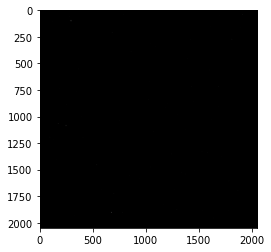

In [5]:
import matplotlib.pyplot as plt
#---------------------------------------------------
# Ingrese su código aquí
#---------------------------------------------------
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(imagen)



Es muy probable que no se distinga nada en la imagen debido a que, en promedio, la intensidad de los pixeles es muy distinta a la intensidad máxima. Para resolver este problema, explore los argumentos por defecto `vmin` y `vmax` de `imshow`.

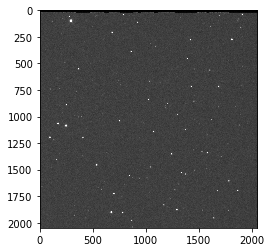

In [6]:
#---------------------------------------------------
# Ingrese su código aquí
#---------------------------------------------------
plt.figure()
plt.imshow(imagen,vmin=0,vmax=1000)



Ahora ya es posible ver estrellas dentro de la imagen. 

## Parte 4

El próximo paso para la tarea es el de leer el archivo `estrellas.csv`. Dentro de este archivo se encuentran las posiciones de ciertas estrellas de interés.

Despliegue la información de este archivo e identifique el número de estrellas en él.

In [7]:
#---------------------------------------------------
# Ingrese su código aquí
#---------------------------------------------------
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

estrellas = pd.read_csv('estrellas.csv')

print(estrellas.columns)
print(estrellas.head(10))
print(estrellas.tail(10))
print('Cantidad de estrellas:',len(estrellas))


Index(['#nombre', 'y0', 'x0'], dtype='object')
  #nombre    y0    x0
0      E1   532  1453
1      E2  1237  1352
2      E3  1678   718
3      E4   362   551
4      E5  1802   274
5      E6   670  1900
6      E7  1774  1606
7      E8   747  1041
8      E9   777  1901
  #nombre    y0    x0
0      E1   532  1453
1      E2  1237  1352
2      E3  1678   718
3      E4   362   551
4      E5  1802   274
5      E6   670  1900
6      E7  1774  1606
7      E8   747  1041
8      E9   777  1901
Cantidad de estrellas: 9


## Parte 5

Escriba una función para sumar las intensidades de todos los pixeles que se encuentren a una distancia menor o igual a `r` de una posición `(x0,y0)`, donde estos últimos parámetros sean __argumentos__ de la función.

La función debe retornar:
- $S$: Suma de las intensidades para todos los pixeles dentro del círculo de radio $r$ y centrado en $(x_0,y_0)$, es decir, de todos los pixeles $(x,y)$ que cumplan con $(x-x_0)^2 + (y-y_0)^2 <= r^2$. 
- $M$: La mediana de la intensidad de los pixeles que estén dentro del círculo definido anteriormente.
- $N$: Número de pixeles incluidos dentro del círculo.

Para esto, considere realizar un filtro (masking) con booleans de la imágen para identifar aquellos pixeles dentro del círculo.

In [8]:
#---------------------------------------------------
# Ingrese su código aquí
"""
Ejemplo:
-------

def suma_pixeles(r, x0, y0):
    ...
    return (S, M, N)
"""
#---------------------------------------------------
"""
def suma_pixeles(imagen, r, x0, y0):
 
    for x in np.nditer(imagen[x0,y0]):
        
    imagen[x0,y0]
    return (S,M,N)
    
"""
import statistics as stats
indices = lambda x0,y0,r:[(x, y) for x in range(x0-2*r,x0+2*r) for y in range(y0-2*r,y0+2*r) if (x-x0)*(x-x0)+(y-y0)*(y-y0)<=r*r]
ixy=indices(0,0,10)
#print(len(ixy),ixy)


def suma_pixeles(r,x0,y0,imagen):
    ind_xy=indices(x0,y0,r)
    S, M, N = 0, 0, 0
    l=[]
    for indice in ind_xy:
#        print(S,imagen[indice])
#        S+=imagen[indice]
        l.append(imagen[indice])
#    print(sum(l),len(l), stats.median(l))
#    N=len(ind_xy)
#    print(l)
    S=sum(l)
    M=stats.median(l)
    N=len(l)
    return (S,M,N)
Suma, Mediana, Número = suma_pixeles(1,10,10,imagen)
print(Suma, Mediana, Número)

#print(imagen[ixy[0]],len(ixy),ixy)
"""
def dentro_del_circulo(r,x0,y0):
    
    lxy=[(x, y) for x in range(x0-(r-1),x0+(r+1)) for y in [3,1,4] if x != y] 
    
    return lxy
x0, y0, r = 10, 100, 4
txy=[(x, y) for x in range(x0-r-1,x0+r+1) for y in range(y0-r-1,y0+r+1) if (x-x0)*(x-x0)+(y-y0)*(y-y0)<=r*r]
x1 , y1 = txy[0]
print(txy[0],x1,y1, imagen[x1,y1], imagen[6,100])
imagen[txy[0]]
"""
#Nada

50.64233589172363 4.661665 5


'\ndef dentro_del_circulo(r,x0,y0):\n    \n    lxy=[(x, y) for x in range(x0-(r-1),x0+(r+1)) for y in [3,1,4] if x != y] \n    \n    return lxy\nx0, y0, r = 10, 100, 4\ntxy=[(x, y) for x in range(x0-r-1,x0+r+1) for y in range(y0-r-1,y0+r+1) if (x-x0)*(x-x0)+(y-y0)*(y-y0)<=r*r]\nx1 , y1 = txy[0]\nprint(txy[0],x1,y1, imagen[x1,y1], imagen[6,100])\nimagen[txy[0]]\n'


## Parte 6

Para cada estrella del archivo encuentre la suma $S$ y mediana $M$ de las intensidades dentro de la imágen asi como el número de pixeles dentro de círculos de radio $r_1=15$ y $r_2=30$.

In [10]:
#---------------------------------------------------
# Ingrese su código aquí
#---------------------------------------------------
import numpy as np

#imagen
#for elemento in estrellas:
#    print(elemento)
#type(estrellas)
#estrellas.index
#estrellas.describe
#estrellas['x0']
#lst = [estrellas[i].tolist() for i in estrellas.columns]
#lst2 = [estrellas[i].values for i in estrellas.columns]
#print(lst,lst2)
#print(estrellas['y0'].values,estrellas['x0'].values )
lx, ly = estrellas['x0'].values, estrellas['y0'].values
#print(lx,ly, lx[0], ly[0])
#new_estrellas=None
new_estrellas=estrellas 
#new_estrellas['Suma','Mediana','N']=[suma_pixeles(15,lx[i],ly[i],imagen) for i in range(len(lx))] 
lsmnr1=[suma_pixeles(15,lx[i],ly[i],imagen) for i in range(len(lx))] 
lsmnr2=[suma_pixeles(30,lx[i],ly[i],imagen) for i in range(len(lx))] 
#suma_pixeles(15,lx[0],ly[0],imagen)
#suma_pixeles(30,lx[0],ly[0],imagen)
#print(lsmn, new_estrellas,new_estrellas.shape, estrellas )
myarrayr1 = np.asarray(lsmnr1)
print(myarrayr1, myarrayr1.shape, myarrayr1[:,0])

new_estrellas['r1'] = 15
new_estrellas['S1'] = myarrayr1[:,0]
new_estrellas['M1'] = myarrayr1[:,1]
new_estrellas['N1'] = myarrayr1[:,2]
myarrayr2 = np.asarray(lsmnr2)

new_estrellas['r2'] = 30
new_estrellas['S2'] = myarrayr2[:,0]
new_estrellas['M2'] = myarrayr2[:,1]
new_estrellas['N2'] = myarrayr2[:,2]


print(new_estrellas)
#print(lsmn, len(lsmn))
#estrellas['S_r10'], estrellas['M_r10'], estrellas['N_r10'] = suma_pixeles(10,estrellas['x0'],estrellas['y0'],imagen) 
#suma_pixeles(10,estrellas['x0'],estrellas['y0'],imagen) 

[[6.96313263e+05 3.58078796e+02 7.09000000e+02]
 [3.41920930e+05 2.86486420e+02 7.09000000e+02]
 [3.64821714e+05 2.86164124e+02 7.09000000e+02]
 [3.66145092e+05 2.92204071e+02 7.09000000e+02]
 [5.93333464e+05 3.20979828e+02 7.09000000e+02]
 [1.05095269e+06 4.20828522e+02 7.09000000e+02]
 [4.47621840e+05 2.99541199e+02 7.09000000e+02]
 [3.29286069e+05 2.87157135e+02 7.09000000e+02]
 [3.28899552e+05 2.88904541e+02 7.09000000e+02]] (9, 3) [ 696313.26322937  341920.92959595  364821.7142334   366145.09197998
  593333.46432495 1050952.68795776  447621.83988953  329286.06922913
  328899.55210876]
  #nombre    y0    x0  r1            S1          M1     N1  r2            S2  \
0      E1   532  1453  15  6.963133e+05  358.078796  709.0  30  1.242648e+06   
1      E2  1237  1352  15  3.419209e+05  286.486420  709.0  30  8.747504e+05   
2      E3  1678   718  15  3.648217e+05  286.164124  709.0  30  8.949347e+05   
3      E4   362   551  15  3.661451e+05  292.204071  709.0  30  9.006571e+05   
4  

## Parte 7
Una aproximación a la magnitud (brillo de una estrella) está dado por la relación $$ mag = -2.5*\log_{10}\left(S_1 - N_1* M_2\right), $$
donde $S_1$ y $N_1$ son la suma de intensidades y el número de pixeles dentro de círculo de radio $r_1$, y $M_2$ es la mediana de intensidades dentro del cículo de radio $r_2$.

Encuentre la magnitud para cada una de las estrellas del archivo `estrellas.csv`

In [15]:
#----------------------------------
# Ingrese su solución en esta celda
#----------------------------------
new_estrellas['mag']=new_estrellas['S1']-new_estrellas['N1']*new_estrellas['M2']
new_estrellas['mag']=-2.5*np.log10(new_estrellas['S1']-new_estrellas['N1']*new_estrellas['M2'])
print(new_estrellas)


  #nombre    y0    x0  r1            S1          M1     N1  r2            S2  \
0      E1   532  1453  15  6.963133e+05  358.078796  709.0  30  1.242648e+06   
1      E2  1237  1352  15  3.419209e+05  286.486420  709.0  30  8.747504e+05   
2      E3  1678   718  15  3.648217e+05  286.164124  709.0  30  8.949347e+05   
3      E4   362   551  15  3.661451e+05  292.204071  709.0  30  9.006571e+05   
4      E5  1802   274  15  5.933335e+05  320.979828  709.0  30  1.121139e+06   
5      E6   670  1900  15  1.050953e+06  420.828522  709.0  30  1.604760e+06   
6      E7  1774  1606  15  4.476218e+05  299.541199  709.0  30  9.774180e+05   
7      E8   747  1041  15  3.292861e+05  287.157135  709.0  30  8.659830e+05   
8      E9   777  1901  15  3.288996e+05  288.904541  709.0  30  8.645638e+05   

           M2      N2        mag  
0  265.065765  2821.0 -14.265475  
1  256.695526  2821.0 -13.009783  
2  255.877029  2821.0 -13.158527  
3  258.506897  2821.0 -13.155319  
4  257.030579  2821.0 -1

## Parte 8
Guarde un archivo `csv` con la información del brillo de cada estrella. El formato debe ser el siguiente (ejemplo):

|`Nombre`|`x0`|`y0`|`mag`|`r1`|`S1`|`M1`|`N1`|`r2`|`S2`|`M2`|`N2`|
|-|-|-|-|-|-|-|-|-|-|-|-|
|E1|534|1384|-14.86|15|1060500|1500|707|30|1767250|250|2827|

In [22]:
#----------------------------------
# Ingrese su solución en esta celda
#----------------------------------
new_estrellas.to_csv('PruebaT3v3.csv', columns =['Nombre','x0','y0','mag','r1','S1','M1','N1','r2','S2','M2','N2'],index=False)

In [17]:
print(new_estrellas)

  #nombre    y0    x0  r1            S1          M1     N1  r2            S2  \
0      E1   532  1453  15  6.963133e+05  358.078796  709.0  30  1.242648e+06   
1      E2  1237  1352  15  3.419209e+05  286.486420  709.0  30  8.747504e+05   
2      E3  1678   718  15  3.648217e+05  286.164124  709.0  30  8.949347e+05   
3      E4   362   551  15  3.661451e+05  292.204071  709.0  30  9.006571e+05   
4      E5  1802   274  15  5.933335e+05  320.979828  709.0  30  1.121139e+06   
5      E6   670  1900  15  1.050953e+06  420.828522  709.0  30  1.604760e+06   
6      E7  1774  1606  15  4.476218e+05  299.541199  709.0  30  9.774180e+05   
7      E8   747  1041  15  3.292861e+05  287.157135  709.0  30  8.659830e+05   
8      E9   777  1901  15  3.288996e+05  288.904541  709.0  30  8.645638e+05   

           M2      N2        mag  
0  265.065765  2821.0 -14.265475  
1  256.695526  2821.0 -13.009783  
2  255.877029  2821.0 -13.158527  
3  258.506897  2821.0 -13.155319  
4  257.030579  2821.0 -1

In [18]:
print(new_estrellas.columns)

Index(['#nombre', 'y0', 'x0', 'r1', 'S1', 'M1', 'N1', 'r2', 'S2', 'M2', 'N2',
       'mag'],
      dtype='object')


In [19]:
new_estrellas.rename(columns={'#nombre': 'Nombre'}, inplace=True)

In [20]:
print(new_estrellas.columns)

Index(['Nombre', 'y0', 'x0', 'r1', 'S1', 'M1', 'N1', 'r2', 'S2', 'M2', 'N2',
       'mag'],
      dtype='object')
